# Final Project Submission

* Student name: Rachel Spiro
* Student pace: self paced Online Data Science
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL: https://rspiro9.github.io/decision_tree_classification_guide


For this analysis, I will be looking at a dataset including information on police reported stops under Terry v. Ohio, 392 U.S. 1 (1968). This data will be utilized for a **classification analysis to predict if an arrest ended up being made as a final resolution to the police terry stop.** By definition, a terry stop is when a police officer stops a person based on 'reasonable suspicion' that the person may have been involved in criminal activity.

The workbook will be set up using the OSEMN data science process framework as layed out below:
1. Obtain - Import the data, take an initial look through the data, and gather all necessary information and resources.
2. Scrub - This is when we will pre-process and clean our data so that it is ready for analysis. Steps may include changing to appropriate datatypes, removing unnecesary data/columns, and reformatting data where needed.
3. Explore - Dive into the data through analyses and visualizations to better understand what we will be modeling.
4. Model - Build and fit model appropriate to the dataset. Adjust and approve model to best fit the data.
5. Interpret - Look at the results of the model and evaluate what they mean. Communicate these results to key stakeholders so that they are aware of your findings.

# Part 1: Obtain

I will start by importing any necessary libraries that will be used throughout the analysis. I will then import the data.

In [1]:
# Importing libraries to work/explore data and create visualizations
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(style='white')
%matplotlib inline
from scipy import stats
plt.style.use("ggplot")

# Libraries for machine learning modeling & confusion matrices
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import DataConversionWarning
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv('Terry_Stops.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,...,01:06:00,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-
3,-,-1,20150000002815,51725,Field Contact,None,7456,1979,M,White,...,19:27:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
4,-,-1,20150000002815,51727,Field Contact,None,7456,1979,M,White,...,19:32:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-


There are 23 columns in our dataset. Below is a brief description of the data each column represents:

- **Subject Age Group:** Subject Age Group (10 year increments) as reported by the officer.
- **Subject ID:** Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.
- **GO/SC Num:** General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.
- **Terry Stop ID:** Key identifying unique Terry Stop reports.
- **Stop Resolution:** Resolution of the stop as reported by the officer.
- **Weapon Type:** Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.
- **Officer ID:** Key identifying unique officers in the dataset.
- **Officer YOB:** Year of birth, as reported by the officer.
- **Officer Gender:** Gender of the officer, as reported by the officer.
- **Officer Race:** Race of the officer, as reported by the officer.
- **Subject Perceived Race:** Perceived race of the subject, as reported by the officer.
- **Subject Perceived Gender:** Perceived gender of the subject, as reported by the officer.
- **Reported Date:** Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
- **Reported Time:** Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
- **Initial Call Type:** Initial classification of the call as assigned by 911.
- **Final Call Type:** Final classification of the call as assigned by the primary officer closing the event.
- **Call Type:** How the call was received by the communication center.
- **Officer Squad:** Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
- **Arrest Flag:** Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).
- **Frisk Flag:** Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
- **Precinct:** Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
- **Sector:** Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
- **Beat:** Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

# Part 2: Scrub

Now that we have our data imported, it's time to go through and pre-process the date. We do this to make sure that our data is in the correct format that we need it in and that there are no funky things happening with the data that may impact our ability to model.

So let's go ahead and explore the data a bit more.

In [3]:
# See what datatypes we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40389 entries, 0 to 40388
Data columns (total 23 columns):
Subject Age Group           40389 non-null object
Subject ID                  40389 non-null int64
GO / SC Num                 40389 non-null int64
Terry Stop ID               40389 non-null int64
Stop Resolution             40389 non-null object
Weapon Type                 40389 non-null object
Officer ID                  40389 non-null object
Officer YOB                 40389 non-null int64
Officer Gender              40389 non-null object
Officer Race                40389 non-null object
Subject Perceived Race      40389 non-null object
Subject Perceived Gender    40389 non-null object
Reported Date               40389 non-null object
Reported Time               40389 non-null object
Initial Call Type           40389 non-null object
Final Call Type             40389 non-null object
Call Type                   40389 non-null object
Officer Squad               39856 non-null ob

It looks like most of our columns are listed as objects (or categorical data), with a few that have numerical data. Let's see if we have any null values.

In [4]:
# Check for null values:
print('#Rows, #Cols :',df.shape,'\n')
print(df.isna().sum())

#Rows, #Cols : (40389, 23) 

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               533
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64


It looks like the Officer Squad columns has some null values. I am actually not going to be utilizing this column during my analysis, so I will remove the whole column in a few steps from now.

We will be using this dataset to predict if an arrest is made after the Terry stop. Therefore, it would be helpful to identify the values in the Stop Resolution column as 'arrested' vs. 'not-arrested'. To do so, I will map a value of 1 to any 'arrested' values and all other values will get a 0.

In [5]:
# Update the Stop Resolution column to either be arrested (1) or not arrested (0):
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0,'Offense Report': 0,
                                                   'Referred for Prosecution': 0,'Citation / Infraction': 0})
df['Stop Resolution'].value_counts()

0    30557
1     9832
Name: Stop Resolution, dtype: int64

We have a column reptesenting the reported date of each police stop. To better utilize this data, I will change this column to the datetime format. I will also separate out the day, month, and year into separate columns to utilize each individually as I hypothesize that there could be some spikes in arrests during certain months or even certain years.

In [6]:
# Change the date column to datetime so we can work with it. Add in the month as a new column:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df['Month'] = df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})
df['Day'] = df['Reported Date'].dt.day
df['Year'] = df['Reported Date'].dt.year

Next, we have a column representing the weapon type. Since we have a lot of different weapon types, some of which are similar to each other, I am going to re-identify each weapon either as a firearm, a non-firearm, or no weapon to simplify this column.

In [7]:
# Group weapons into firearms vs. non-firearms vs. no weapon:
df['Weapon Type'] = df['Weapon Type'].map({'Lethal Cutting Instrument': 'Non-Firearm', 
                                           'Knife/Cutting/Stabbing Instrument': 'Non-Firearm',
                                           'Club, Blackjack, Brass Knuckles': 'Non-Firearm',
                                           'Blunt Object/Striking Implement': 'Non-Firearm',
                                           'Mace/Pepper Spray': 'Non-Firearm', 'Club':'Non-Firearm',
                                           'Taser/Stun Gun':'Non-Firearm', 'Blackjack':'Non-Firearm',
                                           'Brass Knuckles':'Non-Firearm', 'Fire/Incendiary Device':'Non-Firearm',
                                           'Handgun':'Firearm','Firearm Other':'Firearm',
                                           'Firearm (unk type)':'Firearm','Firearm':'Firearm',
                                           'Other Firearm':'Firearm', 'Rifle':'Firearm','Shotgun':'Firearm',
                                           'Automatic Handgun':'Firearm','None':'None','-':'None',
                                           'None/Not Applicable':'None'})

There is a column representing the birth year of each officer. I am going to utilize this column to determine the age of each officer.

In [8]:
# Change Officer year of bith to give the officer age:
df['Officer Age'] = 2020-df['Officer YOB']

Taking a look through the different columns we have, not all of them are going to be useful for our analysis. Therefore, I will remove any columns that are not going to be helpful for our analysis. I want to note that I will be removeing both the race and gender of the subject as these inputs are just perceived by the officer and therefore their accuracy cannot be trusted.

In [9]:
# Drop columns that we are not going to need:
df.drop(columns=['Subject ID','GO / SC Num','Officer ID','Officer YOB','Officer Race',
                'Subject Perceived Gender','Subject Perceived Race','Reported Date','Reported Time','Call Type',
                'Officer Squad', 'Sector','Beat','Initial Call Type','Final Call Type','Day'],axis=1, inplace=True)
# See what our final dataset looks like
df.head()

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,-,92317,1,None,M,N,N,South,October,2015,36
1,-,32260,0,None,M,N,N,-,April,2015,57
2,-,46430,0,None,M,N,N,-,May,2015,35
3,-,51725,0,None,M,N,N,-,June,2015,41
4,-,51727,0,None,M,N,N,-,June,2015,41


# Part 3: Explore 

NOw that our data has been scrubbed, let's start to dig into our data a bit through exploratory data analysis. Let's start with taking a general look at how some of our columns looks on a total level.

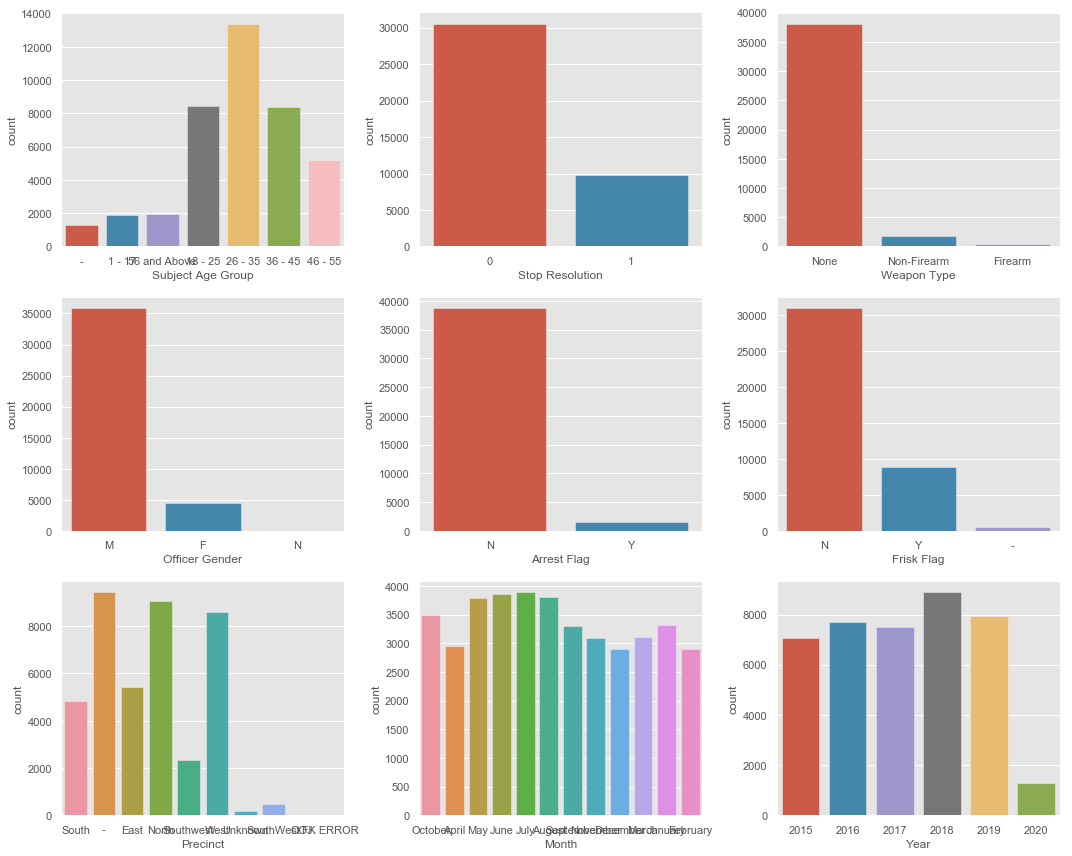

In [10]:
# Plot the count of each column in its own graph:
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(331)
sns.countplot(df['Subject Age Group'])
ax2 = plt.subplot(332)
sns.countplot(df['Stop Resolution'])
ax3 = plt.subplot(333)
sns.countplot(df['Weapon Type'])
ax4 = plt.subplot(334)
sns.countplot(df['Officer Gender'])
ax4 = plt.subplot(335)
sns.countplot(df['Arrest Flag'])
ax5 = plt.subplot(336)
sns.countplot(df['Frisk Flag'])
ax6 = plt.subplot(337)
sns.countplot(df['Precinct'])
ax7 = plt.subplot(338)
sns.countplot(df['Month'])
ax8 = plt.subplot(339)
sns.countplot(df['Year'])

plt.tight_layout()
plt.show()

We do see  variation in some of these charts so let's dive a little deeper. First, let's see how many arrests we have overall.

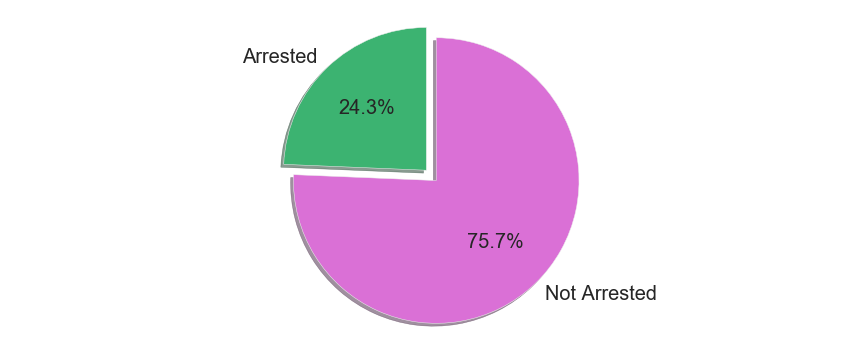

In [11]:
# Create chart labels and calculate the size of each piece of the pie:
labels = 'Arrested', 'Not Arrested'
sizes = [df['Stop Resolution'].sum(), (len(df['Stop Resolution'])-df['Stop Resolution'].sum())]
explode = (0.1, 0)  # "explode" the arrested slice

# Create a pie chart showing % arrested vs. % not arrested:
fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, explode=explode, colors = ['Mediumseagreen','Orchid'],labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 20})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

Just under a quarter of all terry stops appear to result in an arrest. Next, it seems like some arrests may be made later on after the terry stop is over rather than right away during the stop, so I want to see how the number of arrests made during a terry stop compares to the total number of arrests made. I will chart the percent of arrests made during terry stops per month (based on the 'Arrest Flag' column) vs. the percent of total arrests made per month.

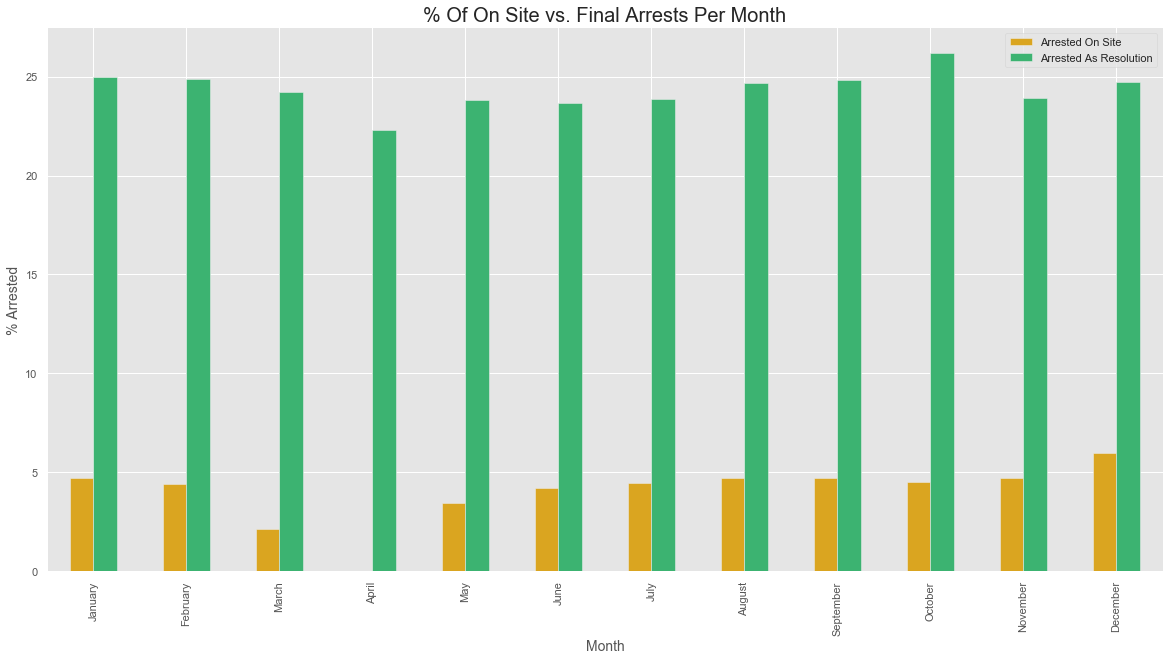

In [12]:
# Collect all rows of data were there was an arrest flag, meaning an arrest during the terry stop:
yes_arrest = df[df['Arrest Flag']=='Y']

# Calculate the percent of arrests made during the terry stop compared to the total number of terry stops per month
percent_yes= (yes_arrest['Arrest Flag'].groupby(df['Month']).count() / 
              df['Arrest Flag'].groupby(df['Month']).count())*100

# Re-order to be in the correct order by month:
percent_yes = percent_yes.reindex(["January", "February", "March","April","May","June","July",
                                   "August","September","October","November","December"])
# Turn into a dataframe:
percent_yes = pd.DataFrame(percent_yes)

# Do the same as above for the Stop Resolution column:
yes_arrest_resolution = df[df['Stop Resolution']==1]
percent_yes_resolution = (yes_arrest_resolution['Stop Resolution'].groupby(df['Month']).count() / 
                     df['Stop Resolution'].groupby(df['Month']).count())*100
percent_yes_final = percent_yes_resolution.reindex(["January", "February", "March","April","May","June","July",
                                                         "August","September","October","November","December"])
percent_yes_final = pd.DataFrame(percent_yes_final)

# Combine the above 2 dataframes into one dataframe and reset the index column:
combined_percent_yes = pd.concat([percent_yes,percent_yes_final],axis=1)
combined_percent_yes.reset_index(inplace=True)

# Create a bar chart comparing the % of arrests during the terry stop vs. % of arrests as a final resolution:
combined_percent_yes.plot(x='Month',y=["Arrest Flag","Stop Resolution"],kind="bar",figsize=(20,10),
                          colors=['goldenrod','Mediumseagreen'])
# Add chart title, labels, and legend
plt.title('% Of On Site vs. Final Arrests Per Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('% Arrested', fontsize=14)
plt.legend(labels=['Arrested On Site','Arrested As Resolution']);

It seems like on average, less than 5% of stops have an arrest during the stop. However, we see a pretty big increase in the percent of arrests determined as the final solution to the stop.

Let's see if the number of arrests varies by the subject's age range.

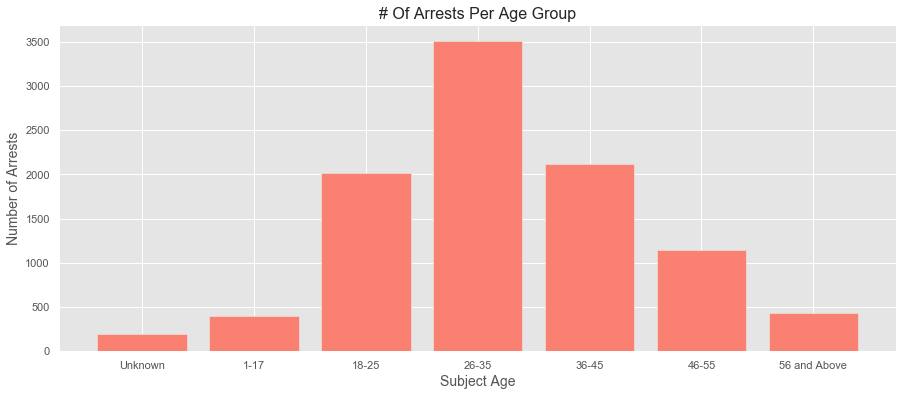

In [13]:
# Indicate age ranges for x-axis:
age_ranges = ['Unknown','1-17','18-25','26-35','36-45','46-55','56 and Above']

# Select values grouped by age range for y-axis:
data_plot = df['Stop Resolution'].groupby(df['Subject Age Group']).sum()

# Plot graph:
plt.figure(figsize=(15,6))
plt.bar(age_ranges, data_plot, color='salmon')
plt.xlabel("Subject Age",fontsize=14)
plt.ylabel("Number of Arrests",fontsize=14)
plt.title('# Of Arrests Per Age Group', fontdict={'fontsize': 16})
plt.show()

Most arrests seem to happen to people aged 26-35, with only a few being under 18 or above 56. Let's see if these age ranges with more arrests also have more cases where a weapon was present.

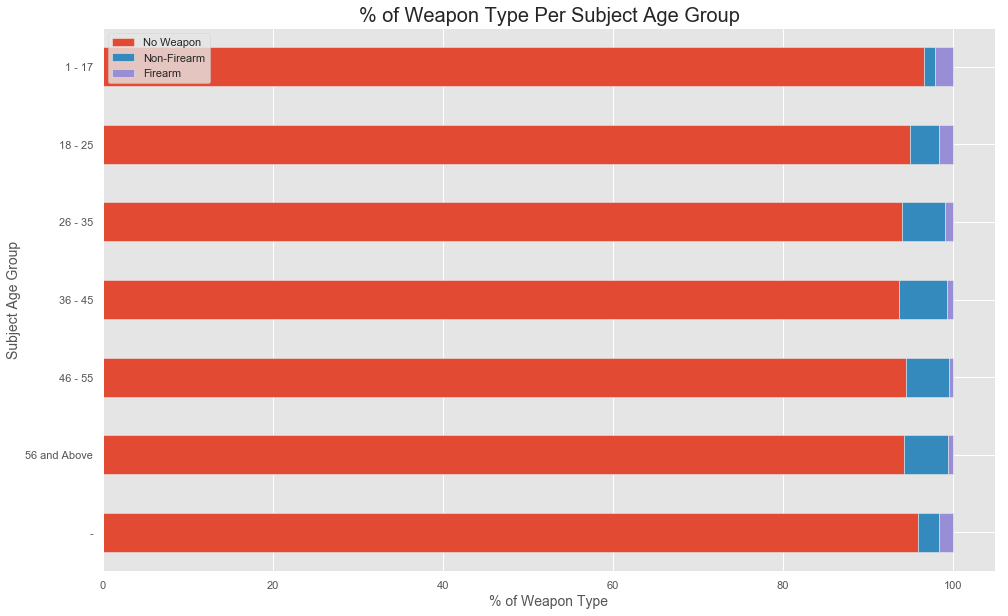

In [14]:
# Collect all rows of data were there was no weapon:
no_weapon = df[df['Weapon Type']=='None']

#Calculate the percent of cases where no weapon was present compared to the total number of terry stops per age group:
no_weapon_grouped = (no_weapon['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                     df['Weapon Type'].groupby(df['Subject Age Group']).count())*100

# Re-order to be in the correct order by age range:
no_weapon_grouped = no_weapon_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
# Turn into a dataframe:
no_weapon_final = pd.DataFrame(no_weapon_grouped)

# Collect all rows of data were there was a firearm:
firearm = df[df['Weapon Type']=='Firearm']
firearm_grouped = (firearm['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                   df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
firearm_grouped = firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
firearm_final = pd.DataFrame(firearm_grouped)

# Collect all rows of data were there was a non-firearm weapon:
non_firearm = df[df['Weapon Type']=='Non-Firearm']
non_firearm_grouped = (non_firearm['Weapon Type'].groupby(df['Subject Age Group']).count() /
                       df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
non_firearm_grouped = non_firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55",
                                                   "56 and Above","-"])
non_firearm_final = pd.DataFrame(non_firearm_grouped)

# Combine the above 3 dataframes into one dataframe and reset the index column:
combined_weapon = pd.concat([no_weapon_final,non_firearm_final,firearm_final],axis=1)
combined_weapon.reset_index(inplace=True)

# Create a bar chart comparing the % of arrests during the terry stop vs. % of arrests as a final resolution:
combined_weapon.plot(x='Subject Age Group',y="Weapon Type",kind="barh",stacked=True,figsize=(16,10))
plt.gca().invert_yaxis() # reverse order of y-axis so 1-17 is at the top

# Add chart title, labels, and legend
plt.title('% of Weapon Type Per Subject Age Group', fontsize=20)
plt.xlabel('% of Weapon Type', fontsize=14)
plt.ylabel('Subject Age Group', fontsize=14)
plt.legend(labels=['No Weapon','Non-Firearm','Firearm']);

It looks like those age ranges with more arrests (26-35 and 36-45) do have more weapons involved in the terry stops, though most of the weapons are not firearms. Let's now see what the breakdown of weapons type is per age range in the cases where an arrest was made.

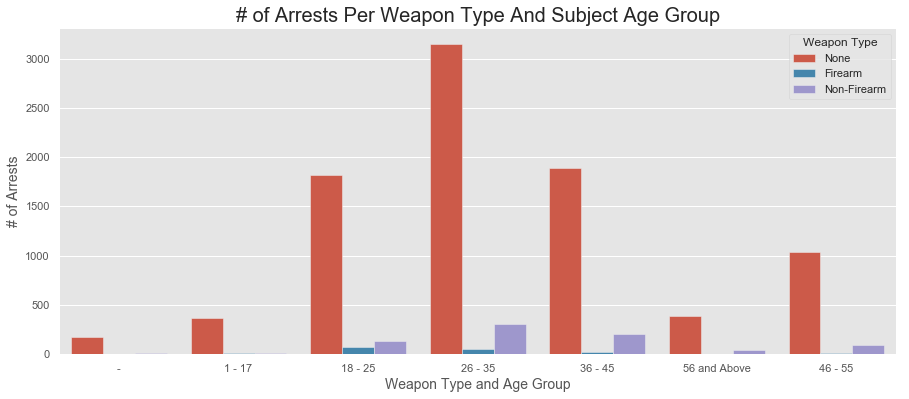

In [15]:
# Use only data where an arrest was made and count how many of each weapon type for each age range exists:
plt.figure(figsize=(15,6))
arrested = df[df['Stop Resolution']==1]
sns.countplot(data=arrested,x='Subject Age Group',hue='Weapon Type')

# Add chart title, and labels:
plt.title('# of Arrests Per Weapon Type And Subject Age Group', fontsize=20)
plt.xlabel('Weapon Type and Age Group', fontsize=14)
plt.ylabel('# of Arrests', fontsize=14);

Similar to the total chart we looked at previously, we see here that most arrests have no weapons. However there is a spike of weapons (both firearm and non-firearm) found in the 18-25 and 26-35 age range, and the 36-45 age range also has a spike of non-firearm weapons.

Moving on from the subjects, let's investigate the police officers a bit. Let's take a look at if the gender of the officer plays a roll in how likely it is for an arrest to occur.

# of Female vs. Male officers 
 M    35894
F     4488
Name: Officer Gender, dtype: int64


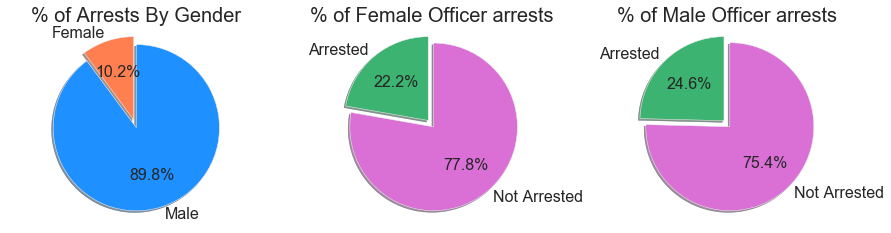

In [16]:
# Remove rows where officer gender was unidentified:
df = df[df['Officer Gender'] != 'N']

# Create chart labels and calculate the size of each piece of the pie for the total chart:
labels_tot = 'Female', 'Male'
sizes_tot = [yes_arrest_resolution[yes_arrest_resolution['Officer Gender']=='F']['Officer Gender'].count(),
          yes_arrest_resolution[yes_arrest_resolution['Officer Gender']=='M']['Officer Gender'].count()]

# Create chart labels and calculate the size of each piece of the pie for female officers:
labels_F = 'Arrested', 'Not Arrested'
sizes_F = [df[df['Officer Gender']=='F']['Stop Resolution'].sum(),
          (len(df[df['Officer Gender']=='F'])-df[df['Officer Gender']=='F']['Stop Resolution'].sum())]

# Create chart labels and calculate the size of each piece of the pie for male officers:
labels_M = 'Arrested', 'Not Arrested'
sizes_M = [df[df['Officer Gender']=='M']['Stop Resolution'].sum(),
          (len(df[df['Officer Gender']=='M'])-df[df['Officer Gender']=='M']['Stop Resolution'].sum())]

# Print # of Female vs. Male officers in total:
print('# of Female vs. Male officers',"\n",df['Officer Gender'].value_counts())

# Set plot figure for each pie chart and explode out the pie piece:
fig = plt.figure(figsize=(15,12))
explode = (0.1, 0)  # "explode" the arrested slice

# Plot pie chart of the % of arrests by gender:
ax1 = plt.subplot(331)
ax1.pie(sizes_tot, explode=explode, colors = ['Coral','Dodgerblue'],labels=labels_tot, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('% of Arrests By Gender', fontsize=20)

# Plot pie chart for % of arrests vs non-arrests for female officers:
ax2 = plt.subplot(332)
ax2.pie(sizes_F, explode=explode, colors = ['Mediumseagreen','Orchid'],labels=labels_F, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('% of Female Officer arrests', fontsize=20)

# Plot pie chart for % of arrests vs non-arrests for male officers:
ax3 = plt.subplot(333)
ax3.pie(sizes_M, explode=explode, colors = ['Mediumseagreen','Orchid'],labels=labels_M, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('% of Male Officer arrests', fontsize=20)
plt.show();

Most arrests are made by male officers, though this can be expected as the vast majority of our officers are male. However, when looking at each gender individually, their arrest rates are rather similar. 

Now let's take a look at if certain precincts give out more arrests than others.

In [17]:
# Determine the % of arrests for each precinct:
precinct = df[df['Stop Resolution']==1]
precinct_grouped = (precinct['Stop Resolution'].groupby(df['Precinct']).count() / 
                   df['Stop Resolution'].groupby(df['Precinct']).count())*100
precinct_final = pd.DataFrame(precinct_grouped)
precinct_final

# Deter,ome the % of non-arrests for each precinct:
precinct1 = df[df['Stop Resolution']==0]
precinct_grouped1 = (precinct1['Stop Resolution'].groupby(df['Precinct']).count() / 
                   df['Stop Resolution'].groupby(df['Precinct']).count())*100
precinct_final1 = pd.DataFrame(precinct_grouped1)
precinct_final1

# Pull together data into one dataframe:
combined_precinct = pd.concat([df['Precinct'].value_counts(),precinct_final,precinct_final1],axis=1)
combined_precinct.columns =['# of Terry Stops', '% Arrested','% Not Arrested']
combined_precinct

,# of Terry Stops,% Arrested,% Not Arrested
-,9432,1.887193,98.112807
East,5417,34.539413,65.460587
FK ERROR,12,8.333333,91.666667
North,9057,25.902617,74.097383
OOJ,16,6.250000,93.750000
South,4828,32.145816,67.854184
SouthWest,495,27.474747,72.525253
Southwest,2320,23.836207,76.163793
Unknown,200,25.500000,74.500000
West,8605,36.513655,63.486345


It looks like the West, East, and South precincts have the highest percentages of arrests. It is interesting that while the North precinct has the most # of terry stops, it does not have a super high percent of resulting arrests.

# Part 4: Model

Now that we have explored our data a little bit, let's begin to model our data so that we can predict whether or not an arrest will be made.  The first thing we will want to do is separate our data into train and test sets so that we can do our best to prevent overfitting or underfitting our model.

In [18]:
# Split into train and test sets:
X = df.loc[:, ['Subject Age Group', 'Weapon Type', 'Arrest Flag', 'Frisk Flag','Precinct','Month',
               'Year','Officer Age', 'Officer Gender']]
y = df.loc[:, 'Stop Resolution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Next, most of our data columns are currently filled with categorical data, which our model will be unable to read. Therefore, we will use one-hot encoding to turn each category within a column into its own column with numerical data so that our model will be able to properly use the data.

In [19]:
# One-hot encode the training data:
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test).toarray()

# Create a dataframe with both training and testing data to be used later:
ohe_df1 = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))
ohe_df2 = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(X_test.columns))
ohe_df = pd.concat([ohe_df1,ohe_df2])

Now that we have our data ready to go, let's dive into utilizing classification models for our analysis.  **Classification** is a technique used to identify which set an observation belongs to. In our case, we will be using classification to predict if a given terry stop ends in an arrest. There are many different types of classification models that can be used. I will try a few different ones and then select whichever model has the best performance. 

We will look at the following four different predictive classification models:
1. Decision Trees
2. K-Nearest-Neighbors
3. Logistic regression
4. Random Forest

I will start by creating a function I can use to draw a confusion matrix. A confusion matrix is a table used to describe the performance of a model, and it is a good way to visualize how accurate our model is. The confusion matrix will show us how many of each of the below groupings the model gives us:
- True Positives (TP) - # of observations where model predicted person was arrested and they actually were arrested
- True Negatives (TN) - # of observations where model predicted person was not arrested and they actually were not arrsted
- False Positive (FP) - # of observations where model predicted person was arrested but they are actually were not arrested
- False Negative (FN) - # of observations where model predicted person was not arrested and the actually were arrested

In [20]:
# Define Confusion Matrix:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''This function will create a confusion matrix chart which shows the accuracy breakdown of the given model.
    Inputs:
    cm: confusion matrix function for tested and predicted y values
    classes: variables to identify for each class (0 or 1)
    normalize: if True will normalize the data, if False will not normalize the data
    title: title of the chart
    cmap: colors to plot
    '''
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Add title and labels:
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Add axis scales and tick marks:
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add labels to each cell:
    thresh = cm.max() / 2.
    # Iterate through confusion matrix and append labels to the plot:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
        
    # Add legend:
    plt.colorbar()
    plt.show()
    
# Use Arrested and Not Arrested for 0 and 1 classes 
class_names = ['Arrested','Not Arrested']

In addition to the confusion matrix, I will also use a classification report, which provides four key metrics in evaluating the performance of a model. The four metrics are:
1. Precision - measures how accurate the predictions are
> <br>Precision = TP / (TP + FP)<br>
2. Recall - % of positives correctly identified
> <br>Recall = TP / (TP + FN)<br>
3. F1-score - Harmonic mean of precision and recall.
> <br>F1-score = 2 x (precision x recall)/(precision + recall)
4. Support - # of samples of the true responses that are in the class.


### 4.1 Decision Trees

We'll start by looking at decision trees. The decision tree model uses a tree-like structure to classify by efficiently partitioning each sample into sets with similar data points until you get to a homogenous set and can reasonably predict values for new data.

First, I will run a grid search to determine which parameters will optimize our model. Once I have the 'best parameters' identified, I can then utize those in the decision tree classification.

In [21]:
# Determine optimal parameters:
# Declare a baseline classifier:
dtree = DecisionTreeClassifier()

# Create a parameter grid and grid search to identify the best parameters:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10)
}
gs_tree = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

# Fit the tuned parameters:
gs_tree.fit(X_train_ohe, y_train)

# Print best estimator parameters:
print(gs_tree.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


Decision Tree Accuracy:  79.95872884853488 %
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9199
           1       1.00      0.17      0.29      2916

    accuracy                           0.80     12115
   macro avg       0.90      0.58      0.59     12115
weighted avg       0.84      0.80      0.74     12115



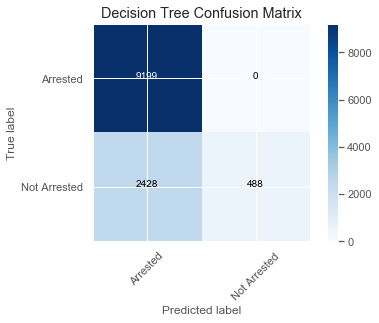

In [34]:
# Create the classifier, fit it on the training data and make predictions on the test set:
d_tree = DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2)
d_tree = d_tree.fit(X_train_ohe, y_train)
y_pred = d_tree.predict(X_test_ohe)

# Check the Accuracy:
print('Decision Tree Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Decision Tree
cm_dtree = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_dtree, classes=class_names, title='Decision Tree Confusion Matrix')

### 4.2 K-Nearest-Neighbors Classifier

The K-Nearest Neighbors (KNN) technique is able to generate a prediction for a data point by finding the k-nearest data points and then predicting the majority class of these k points. This model assumes that the smaller the distance between 2 points, the more similar they are.

We will start by determining our optimal parameters and then will utilize those in the model. Here, we are hoping to find the K value with the highest overall score for its predictions. Since the model gets it's prediction by voting, use odd value of k to avoid getting any ties.

In [24]:
# Find optimial k value:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    '''This function will determine which k value is optimal to use for knn classification by selecting the k value
    with the highest overall accuracy score.
    Inputs:
    X_train, y_train, X_test, y_test: tran and test set values
    min_k: minimum value to try for k
    max_k: maximum value to try for k
        '''
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1,2):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))
    
print(find_best_k(X_train_ohe, y_train, X_test_ohe, y_test))

Best Value for k: 25
Accuracy Score: 0.7971935617003715
None


KNN Accuracy:  79.71935617003714 %
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9199
           1       0.72      0.26      0.38      2916

    accuracy                           0.80     12115
   macro avg       0.76      0.61      0.63     12115
weighted avg       0.78      0.80      0.76     12115



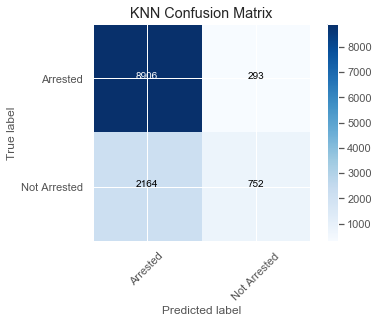

In [26]:
# Create the classifier, fit it on the training data and make predictions on the test set:
knn = KNeighborsClassifier(n_neighbors = 25, algorithm='brute')
knn.fit(X_train_ohe, y_train)
y_pred = knn.predict(X_test_ohe)

# Check the Accuracy:
print('KNN Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Check the AUC:

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for KNN:
cm_knn = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_knn, classes=class_names, title='KNN Confusion Matrix')

### 4.3 Logistic Regression

Regression is a technique used to predict a response variable from one or more predictor variables. There are 2 main types of regression, Linear and Logistic. Linear regression is used when the response variable is continuous, and the regression line is linear. Logistic regression is used when the response variable is binary, and we get a sigmoid function (S-shaped). We will be using logistic regression as it is more apt for classification.

Logistic Regression Accuracy:  79.91745769706975 %
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9199
           1       0.75      0.25      0.37      2916

    accuracy                           0.80     12115
   macro avg       0.78      0.61      0.63     12115
weighted avg       0.79      0.80      0.76     12115



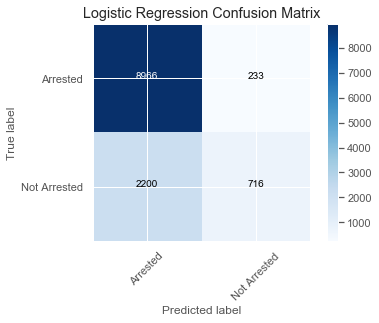

In [27]:
# Create the classifier, fit it on the training data and make predictions on the test set:
logreg = LogisticRegression()
logreg.fit(X_train_ohe, y_train)
y_pred = logreg.predict(X_test_ohe)

# Check the Accuracy:
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Logistic Regression:
cm_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_LR, classes=class_names, title='Logistic Regression Confusion Matrix')

### 4.4 Random Forest

Random forests are an ensemble method for decision trees that both trains trees on different samples of data (bagging) and randomly selects a subset of features to use as predictors (subspace sampling method) to create a 'forest' of decision trees. This method typically gives better predictions than any single decision tree would.

We will again begin by finding the optimal parameters which will then be used in the classification model.

In [28]:
# Determine optimal parameters:
# Declare a baseline classifier:
forest = RandomForestClassifier()

# Create a parameter grid and grid search:           
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_depth' : [None],
              'max_features': range(1,11), 
              'min_samples_split': range(1,6)}
forest_grid_search = GridSearchCV(forest, param_grid, cv=5, n_jobs=-1)

# Fit the tuned parameters:
forest_grid_search.fit(X_train_ohe, y_train)

# Printing best estimator parameters:
print(forest_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 80}


Random Forest Accuracy:  80.34667767230705 %
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      9199
           1       0.66      0.37      0.48      2916

    accuracy                           0.80     12115
   macro avg       0.74      0.66      0.68     12115
weighted avg       0.79      0.80      0.78     12115



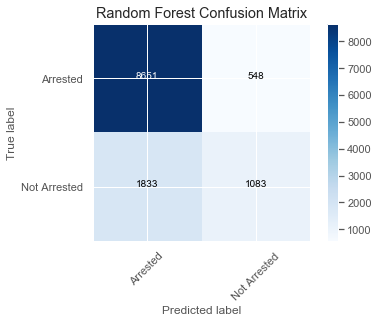

In [44]:
# Create the classifier, fit it on the training data and make predictions on the test set:
rforest = RandomForestClassifier(n_estimators=80, criterion = 'gini',max_depth=None, max_features=5, 
                                 min_samples_split=5)
rforest.fit(X_train_ohe, y_train)
y_pred = rforest.predict(X_test_ohe)

# Check the Accuracy:
print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Random Forest:
cm_forest = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_forest, classes=class_names, title='Random Forest Confusion Matrix')

Now that we've ran all of our models, we can determine which is the most accurate by looking at their accuracy score.

- **Decision Tree:**
    - Accuracy Score: 79.96
- **KNN:**
    - Accuracy Score: 79.72
- **Logistic Regression:**
    - Accuracy Score: 79.92
- **Random Forest:**
    - Accuracy Score: 80.35
    
We can see that our Random Forest classification is most accurate. Let's take a look at which features are most influential when looking at the Random Forest model. Since we have a lot of features, we will look at just the 30 most influential ones.

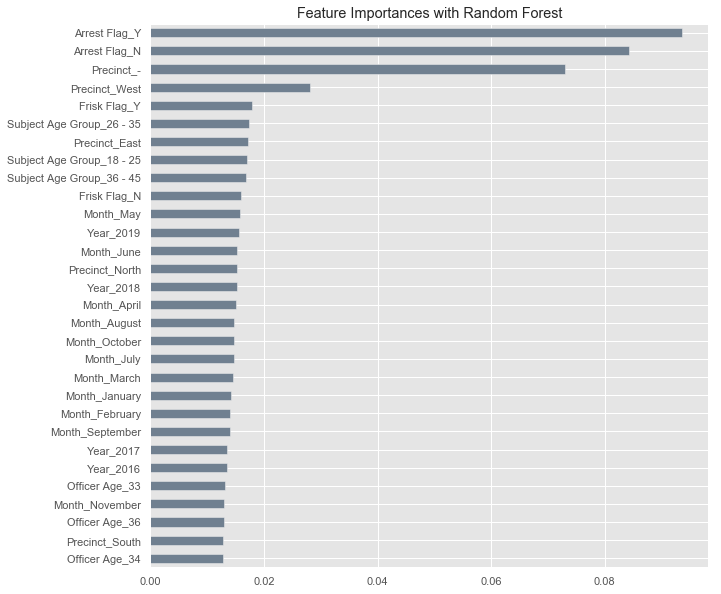

In [45]:
# Plot the 30 most influential features based on Random Forest model:
influential_features = pd.Series(rforest.feature_importances_, index=ohe_df.columns)
influential_features.nlargest(30).sort_values().plot(kind='barh', color='slategrey', figsize=(10,10))
plt.title('Feature Importances with Random Forest');

# Conclusion

After evaluating all four classification models, we end up with Random Forests being the most accurate at 80.35%, followed closely by Decision Tree at 79.96%, then Logistic Regression at 79.92%, and finally KNN at 79.72%.  

Therefore, when using the Random Forest model, we can accurately determine whether or not a Terry Stop ended in an arrest 81.19% of the time. The most influential features when using the Random Forest model are related to the precinct and if there was an arrest flag. The top 5 features are:
    1. Arrest Flag given
    2. Arrest Flag not given
    3. Unkown precint
    4. West Precinct
    5. Frisk Flag given

**Recommendations:**
- Train officers on when is an appropriate time to arrest someone during the terry stop vs. when it is appropriate to wait until later as this is another key indicator of arrests.
- Try to capture the officer's precinct for all terry stops to have a better opportunity to predict if in arrest will occur
- Train officers on when is an appropriate time to 'frisk' someone as this is another key indicator of arrests.

**Next Steps:**

While 80% is decently accurate, there still is room for improvement. Moving forward, I would like to look into further tuning our model, either through cleaning up the data more or through adjusting the model inputs. Additionally, looking into other types of classification models, specifically deep learning models, could also help generate a more accurate model.